In [35]:
%pylab inline
import seaborn as sbn
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sbn
from matplotlib.colors import colorConverter
from matplotlib.collections import PolyCollection
sbn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sbn.set_style( {'font.family':'sans-serif', 'font.sans-serif':'Helvetica'})

cc = lambda arg: colorConverter.to_rgba(arg, alpha=0.6)

Populating the interactive namespace from numpy and matplotlib


/Users/toni_brain/miniconda3/envs/feworkflow/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly', 'norm', 'cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [36]:
c0 = '#377eb8'
c1 = '#ff7f00'

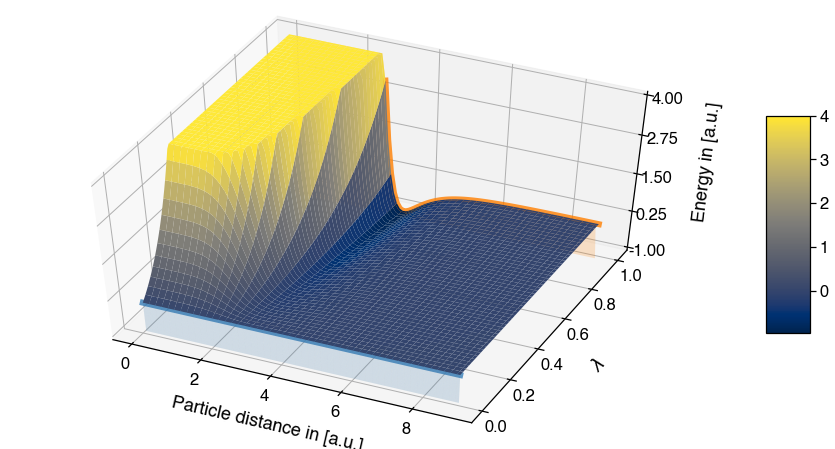

In [37]:
 # Not sure the best one to use.  We want more distincttion lower.  
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

rmin = 0.1
rmax = 9.0
ngrid = 100
alpha = 0.5
sigma = 3.0
eps = 1 
zmax = 4

r = np.linspace(rmin, rmax, ngrid)
lam = np.linspace(0,1,ngrid)
r,lam = np.meshgrid(r,lam)
lamr = 1.0/(alpha*(1.0-lam) + (r/sigma)**6)
u = 4*eps*lam*(lamr**2 - lamr)
u[u>zmax] = zmax

blurg = []
for i in range(ngrid):
    blurg.append(u[-1,:])
blurg = np.array(blurg)

surf = ax.plot_surface(r, lam, u, cmap=cm.cividis,
                       linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-eps, zmax)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#ax.set_title('The softcore interaction potential')
ax.set_xlabel('Particle distance in [a.u.]')
ax.set_ylabel(r'$\lambda$')
ax.set_zlabel('Energy in [a.u.]')

# add lines at lam = 0 and lam = 1 to show the physical endpoints
rrange = np.linspace(rmin,rmax,ngrid) 
ax.plot(rrange,np.zeros(ngrid),np.zeros(ngrid), color=c0,linewidth=6, alpha=0.8)
lj = 4*eps*((rrange/sigma)**(-12) - (rrange/sigma)**(-6))
lj[lj>zmax] = np.nan
ax.plot(rrange,np.ones(ngrid),lj,linewidth=6, color=c1, alpha=0.8)
z = np.arange(0,1,0.01)-1
xx, zz = np.meshgrid(rrange,z)
yy = xx*0
ax.plot_surface(xx, yy, zz, alpha=0.2, color = c0)


verts = []
zs = [1.0]
for z in zs:

    ys = blurg[0,:]
    ys[0], ys[-1] = -1.2, -1.2
    verts.append(list(zip(rrange,ys )))
poly = PolyCollection(verts, facecolors = [cc(c1)],closed=False)
                 
poly.set_alpha(0.2)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20
ax.view_init(elev=50., azim=-65)
plt.show()
#plt.savefig("lj_softcore.pdf")

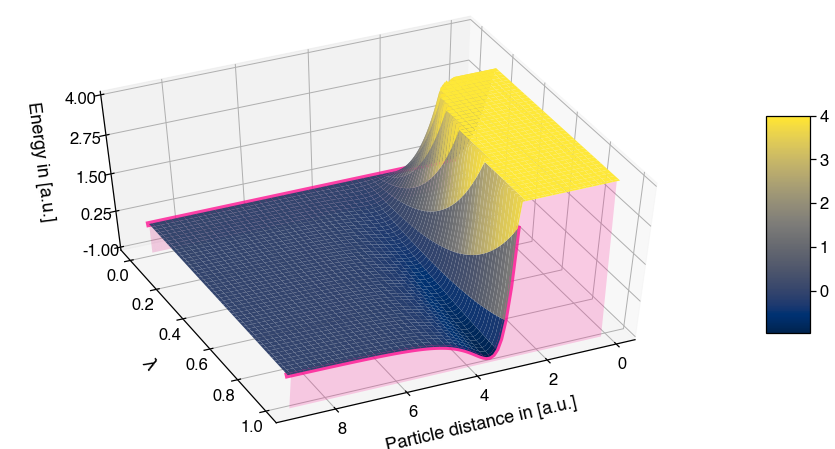

In [14]:
 # Not sure the best one to use.  We want more distincttion lower.  
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

rmin = 0.1
rmax = 9.0
ngrid = 100
alpha = 0.5
sigma = 3.0
eps = 1 
zmax = 4

r = np.linspace(rmin, rmax, ngrid)
lam = np.linspace(0,1,ngrid)
r,lam = np.meshgrid(r,lam)
lamr = 1.0/(alpha*(1.0-lam) + (r/sigma)**6)
u = 4*eps*lam*(lamr**2 - lamr)
u[u>zmax] = zmax

# Coloring according to cmap and energies
surf = ax.plot_surface(r, lam, u, cmap=cm.cividis, linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-eps, zmax)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#ax.set_title('The softcore interaction potential')
ax.set_xlabel('Particle distance in [a.u.]')
ax.set_ylabel(r'$\lambda$')
ax.set_zlabel('Energy in [a.u.]')

# add lines at lam = 0 and lam = 1 to show the physical endpoints
rrange = np.linspace(rmin,rmax,ngrid) 
ax.plot(rrange,np.zeros(ngrid),np.zeros(ngrid), color='deeppink',linewidth=6, alpha=0.8)
lj = 4*eps*((rrange/sigma)**(-12) - (rrange/sigma)**(-6))
lj[lj>zmax] = np.nan
ax.plot(rrange,np.ones(ngrid),lj,linewidth=6, color='deeppink', alpha=0.8)


# shading of plane under curve at lambda =0. 
z = np.arange(0,1,0.01)-1
xx, zz = np.meshgrid(rrange,z)
yy = xx*0
ax.plot_surface(xx, yy, zz, alpha=0.2, color = 'deeppink')


# shading of plane under curve at lambda =1. 
blurg = []
for i in range(ngrid):
    blurg.append(u[-1,:])
blurg = np.array(blurg)
verts = []
zs = [1.0]
for z in zs:

    ys = blurg[0,:]
    ys[0], ys[-1] = -1.2, -1.2
    verts.append(list(zip(rrange,ys )))
poly = PolyCollection(verts, facecolors = [cc('deeppink')],closed=False)
                 
poly.set_alpha(0.2)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20
ax.view_init(elev=50., azim=65)
plt.show()
#plt.savefig("lj_softcore.pdf")

## Let us see if we can colour according to lambda rather than the energy

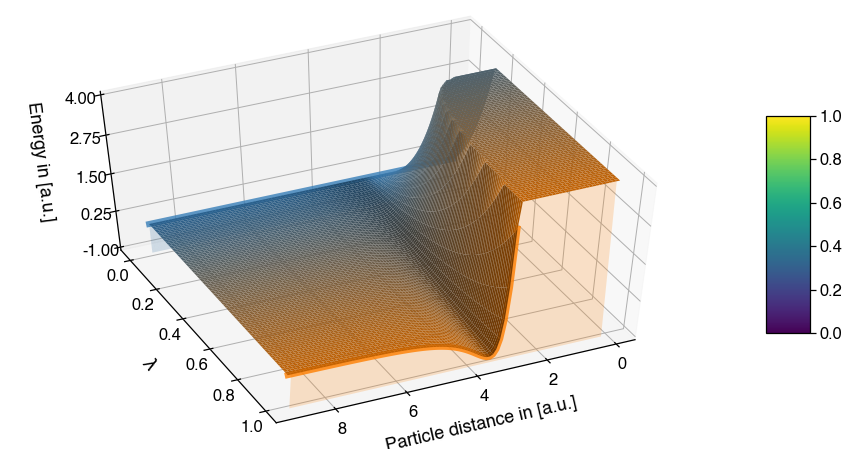

In [33]:
 # Not sure the best one to use.  We want more distincttion lower.  
from matplotlib.collections import PolyCollection
from matplotlib.colors import LinearSegmentedColormap
cmap_name = 'blue_orange'
cm_new = LinearSegmentedColormap.from_list( cmap_name, [c0,c1], N=100)

fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')

rmin = 0.1
rmax = 9.0
ngrid = 100
alpha = 0.5
sigma = 3.0
eps = 1 
zmax = 4

r = np.linspace(rmin, rmax, ngrid)
lam = np.linspace(0,1,ngrid)
r,lam = np.meshgrid(r,lam)
lamr = 1.0/(alpha*(1.0-lam) + (r/sigma)**6)
u = 4*eps*lam*(lamr**2 - lamr)
u[u>zmax] = zmax

# Colormap according to lambda not energy
# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = lam # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap=cm_new)
m.set_array([])
fcolors = m.to_rgba(color_dimension)

surf = ax.plot_surface(r, lam, u, linewidth=0, antialiased=True, rstride=1, cstride=1, 
                       facecolors=fcolors, vmin=minn, vmax=maxx)

# Coloring according to cmap and energies
#surf = ax.plot_surface(r, lam, u, cmap=cm, linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(-eps, zmax)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#ax.set_title('The softcore interaction potential')
ax.set_xlabel('Particle distance in [a.u.]')
ax.set_ylabel(r'$\lambda$')
ax.set_zlabel('Energy in [a.u.]')

# add lines at lam = 0 and lam = 1 to show the physical endpoints
rrange = np.linspace(rmin,rmax,ngrid) 
ax.plot(rrange,np.zeros(ngrid),np.zeros(ngrid), color=c0,linewidth=6, alpha=0.8)
lj = 4*eps*((rrange/sigma)**(-12) - (rrange/sigma)**(-6))
lj[lj>zmax] = np.nan
ax.plot(rrange,np.ones(ngrid),lj,linewidth=6, color=c1, alpha=0.8)


# shading of plane under curve at lambda =0. 
z = np.arange(0,1,0.01)-1
xx, zz = np.meshgrid(rrange,z)
yy = xx*0
ax.plot_surface(xx, yy, zz, alpha=0.2, color = c0)


# shading of plane under curve at lambda =1. 
blurg = []
for i in range(ngrid):
    blurg.append(u[-1,:])
blurg = np.array(blurg)
verts = []
zs = [1.0]
for z in zs:

    ys = blurg[0,:]
    ys[0], ys[-1] = -1.2, -1.2
    verts.append(list(zip(rrange,ys )))
poly = PolyCollection(verts, facecolors = [cc(c1)],closed=False)
                 
poly.set_alpha(0.2)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20
ax.view_init(elev=50., azim=65)
plt.show()
#plt.savefig("lj_softcore.pdf")